Libraries

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt

Data

In [3]:
# Retrieve attribute names in order
attribute_names = list(np.load('../gen_train_data/data/output/attributes.npy', allow_pickle=True))

# Load test data
X_test_pre = np.load('../gen_train_data/data/output/pre/X_test_pre.npy', allow_pickle=True)
y_test_pre = np.load('../gen_train_data/data/output/pre/y_test_pre.npy', allow_pickle=True)
X_test_post = np.load('../gen_train_data/data/output/post/X_test_post.npy', allow_pickle=True)
y_test_post = np.load('../gen_train_data/data/output/post/y_test_post.npy', allow_pickle=True)

# Type conversion needed    
data_dic = {
    "X_test_pre": pd.DataFrame(X_test_pre, columns=attribute_names).convert_dtypes(),
    "y_test_pre": y_test_pre,
    "X_test_post": pd.DataFrame(X_test_post, columns=attribute_names).convert_dtypes(),
    "y_test_post": y_test_post,
}

In [10]:
method_names = {
    0: "ORIG",
    1: "ORIG_CW",
    2: "OVER",
    3: "UNDER"
}
model_choices = {
    "ORIG": "XGB",
    "ORIG_CW": "RF",
    "OVER": "XGB",
    "UNDER": "XGB"
}

SHAP Plots for OVER

pre-OVER
post-OVER


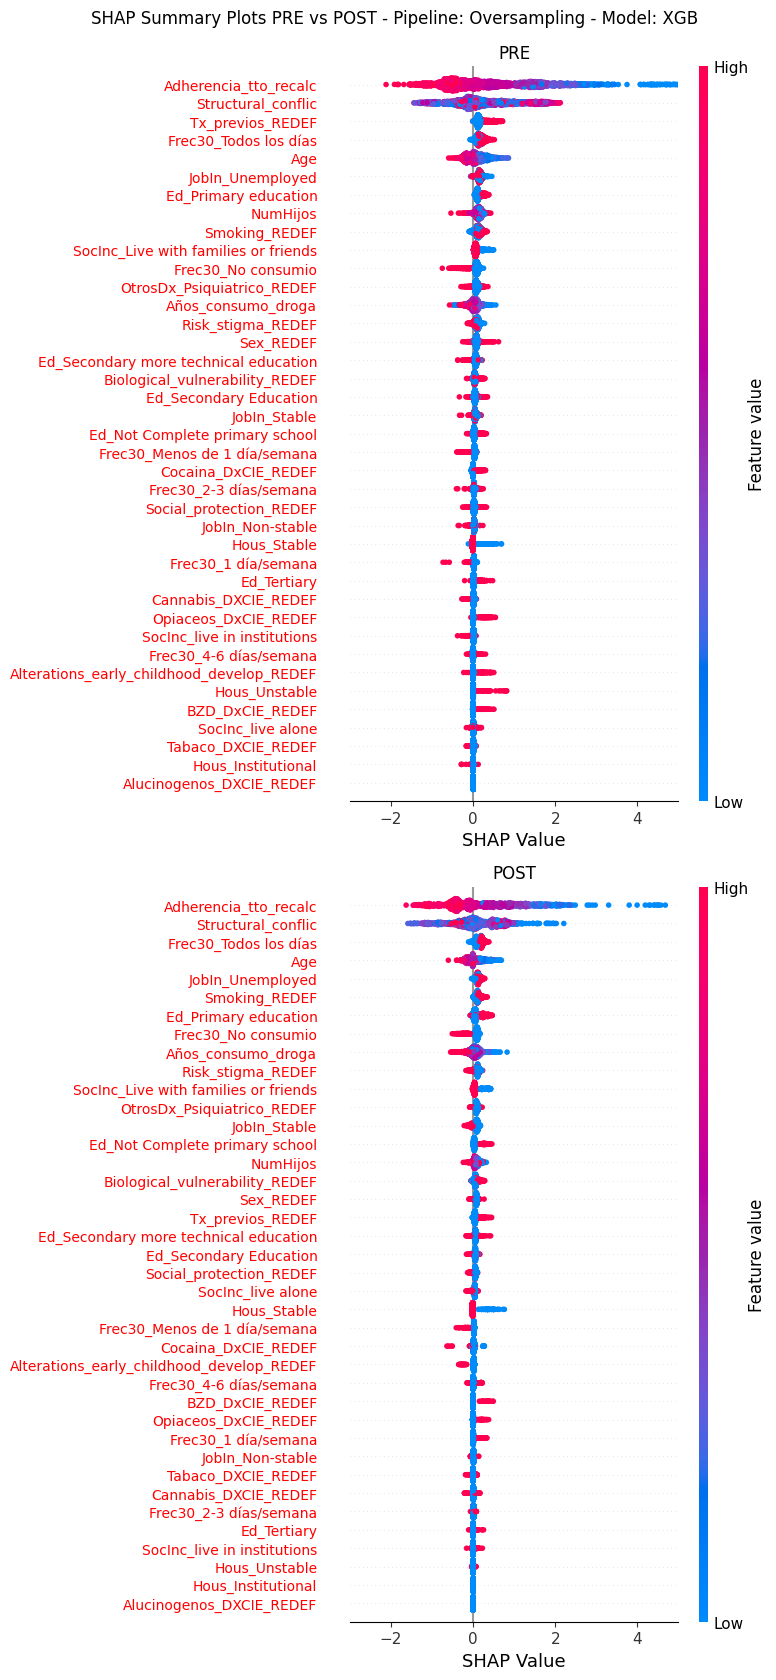

<Figure size 640x480 with 0 Axes>

In [74]:
method_name = 'OVER'
plt.figure(figsize=(25, 50))
for i, group in enumerate(['pre', 'post']):
            X_test = data_dic['X_test_' + group]
            y_test = data_dic['y_test_' + group]
            print(f"{group}-{method_name}")
            model_name = model_choices[method_name]
            shap_vals = np.load(f'./output/shap_values/{group}_{method_name}.npy')
            ax = plt.subplot(2,1,i+1)
            shap.summary_plot(shap_vals, X_test, max_display=len(attribute_names), show=False)
            plt.title(group.upper())
            plt.xlabel('SHAP Value', )
            plt.xlim(-3,5)
            ax.tick_params(axis='y', labelsize=10, labelcolor='red')
            
        
plt.suptitle(f'SHAP Summary Plots PRE vs POST - Pipeline: Oversampling - Model: {model_name}\n')
plt.tight_layout()
plt.show()
plt.savefig(f'./output/plots/shap_summary/{method_name}_{model_name}.svg', format='svg', dpi=1250)